# Contexto de la Base de Datos

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Esta es una base de datos que contiene una lista de personas con un patrimonio mayor a 1 Billón de dólares desde 1996 a 2014. Esta base de datos cuenta con atributos como: Compañia, Sector de la compañia, como entro a la compañia, como se hizo billonario, entre otros.

In [89]:
!apt-get install -y fonts-liberation

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-liberation is already the newest version (1:1.07.4-11).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [90]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
import ydata_profiling
#Se agregarán más en cuanto avance el temario de clase

In [91]:
Billon = pd.read_csv("/content/drive/MyDrive/EstadisticaProyecto/BillonariosData/billionaires.csv")
Billon.head
Billon['Year'].max()

2014

In [92]:
#limites del dataset son [0,2300]

tam_muestra = 800
ricos = Billon.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 800 registros

ricos['Year'].min()

1996

In [93]:
ricos['Name']

2437        Alexander Spanos
1033         Tiong Hiew King
2575             Li Shuirong
1124    Hope Hill Van Beuren
1942            Sun Piaoyang
                ...         
731               Leon Black
1524        Kushal Pal Singh
2380             Liu Xuejing
23           Sheldon Adelson
158           Vladimir Lisin
Name: Name, Length: 800, dtype: object

# Objetivo del Estudio Estadístico

La elección de este dataset consiste en conocer en que sectores se mueven la gente más rica del mundo. También se busca conocer cuales son los sectores empresariales que más dinero mueven, qué características comparten las personas de este dataSet y como consiguierón su fortuna.

In [94]:
ricos.describe()

Rank         Year  Company Founded  Demographics Age  \
count   800.000000   800.000000       800.000000         800.00000   
mean    601.098750  2008.433750      1917.058750          54.05750   
std     464.550391     7.518229       276.743395          24.59523   
min       6.000000  1996.000000         0.000000         -42.00000   
25%     212.750000  2001.000000      1938.750000          48.00000   
50%     449.000000  2014.000000      1962.000000          59.00000   
75%     988.000000  2014.000000      1987.000000          70.00000   
max    1565.000000  2014.000000      2012.000000          98.00000   

       Location GDP  Wealth Worth In Billions  
count  8.000000e+02                800.000000  
mean   1.691345e+12                  3.396125  
std    3.511295e+12                  4.273339  
min    0.000000e+00                  1.000000  
25%    0.000000e+00                  1.300000  
50%    0.000000e+00                  2.000000  
75%    4.000000e+11                  3.400000  
max    1.060000e+13                 40.000000

In [95]:
ricos.describe(exclude = np.number)

Name Company Name Company Relationship Company Sector  \
count                   800          787                  781            791   
unique                  741          636                   41            272   
top     Liliane Bettencourt      Walmart              founder    real estate   
freq                      3            6                  376             51   

       Company Type Demographics Gender Location Citizenship  \
count           786                 787                  800   
unique           12                   2                   60   
top             new                male        United States   
freq            691                 722                  259   

       Location Country Code Location Region Wealth Type Wealth How Category  \
count                    800             800         791                 800   
unique                    61               7           5                   8   
top                      USA   North America   inherited           Financial   
freq                     259             285         294                 241   

       Wealth How From Emerging Wealth How Industry Wealth How Inherited  \
count                       800                 799                  800   
unique                        1                  19                    6   
top                        True            Consumer        not inherited   
freq                        800                 133                  513   

       Wealth How Was Founder Wealth How Was Political  
count                     800                      800  
unique                      1                        1  
top                      True                     True  
freq                      800                      800

In [96]:
ricos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 2437 to 158
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      800 non-null    object 
 1   Rank                      800 non-null    int64  
 2   Year                      800 non-null    int64  
 3   Company Founded           800 non-null    int64  
 4   Company Name              787 non-null    object 
 5   Company Relationship      781 non-null    object 
 6   Company Sector            791 non-null    object 
 7   Company Type              786 non-null    object 
 8   Demographics Age          800 non-null    int64  
 9   Demographics Gender       787 non-null    object 
 10  Location Citizenship      800 non-null    object 
 11  Location Country Code     800 non-null    object 
 12  Location GDP              800 non-null    float64
 13  Location Region           800 non-null    object 
 14  Wealth 

In [97]:
ricos.nunique()


Name                        741
Rank                        244
Year                          3
Company Founded             140
Company Name                636
Company Relationship         41
Company Sector              272
Company Type                 12
Demographics Age             70
Demographics Gender           2
Location Citizenship         60
Location Country Code        61
Location GDP                 56
Location Region               7
Wealth Type                   5
Wealth Worth In Billions    114
Wealth How Category           8
Wealth How From Emerging      1
Wealth How Industry          19
Wealth How Inherited          6
Wealth How Was Founder        1
Wealth How Was Political      1
dtype: int64

In [98]:
factor = list(ricos.loc[:,ricos.nunique() < 10]);
ricos[factor] = ricos[factor].astype('category')
ricos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 2437 to 158
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Name                      800 non-null    object  
 1   Rank                      800 non-null    int64   
 2   Year                      800 non-null    category
 3   Company Founded           800 non-null    int64   
 4   Company Name              787 non-null    object  
 5   Company Relationship      781 non-null    object  
 6   Company Sector            791 non-null    object  
 7   Company Type              786 non-null    object  
 8   Demographics Age          800 non-null    int64   
 9   Demographics Gender       787 non-null    category
 10  Location Citizenship      800 non-null    object  
 11  Location Country Code     800 non-null    object  
 12  Location GDP              800 non-null    float64 
 13  Location Region           800 non-null    categ

In [99]:
ricos_sin_duplicados = ricos.drop_duplicates(subset='Name').copy()
ricos_sin_duplicados.set_index('Name', inplace=True)
ricos_sin_duplicados.nunique()

Rank                        224
Year                          3
Company Founded             140
Company Name                636
Company Relationship         41
Company Sector              272
Company Type                 12
Demographics Age             68
Demographics Gender           2
Location Citizenship         60
Location Country Code        61
Location GDP                 56
Location Region               7
Wealth Type                   5
Wealth Worth In Billions    105
Wealth How Category           8
Wealth How From Emerging      1
Wealth How Industry          19
Wealth How Inherited          6
Wealth How Was Founder        1
Wealth How Was Political      1
dtype: int64

In [100]:
ricos_sin_duplicados.head()

Rank  Year  Company Founded              Company Name  \
Name                                                                          
Alexander Spanos      1465  2014             1960    A. G. Spanos Companies   
Tiong Hiew King        336  2001             1976      Rimbunan Hijau Group   
Li Shuirong           1565  2014             1995   Rongsheng Petrochemical   
Hope Hill Van Beuren   368  1996             1869             Campbell Soup   
Sun Piaoyang           973  2014             1970  Jiangsu Hengrui Medicine   

                     Company Relationship   Company Sector Company Type  \
Name                                                                      
Alexander Spanos                  founder      real estate          new   
Tiong Hiew King                   founder           timber          new   
Li Shuirong                      chairman   petrochemicals          new   
Hope Hill Van Beuren             relation             soup      aquired   
Sun Piaoyang                     chairman  pharmaceuticals          new   

                      Demographics Age Demographics Gender  \
Name                                                         
Alexander Spanos                    90                male   
Tiong Hiew King                     65                male   
Li Shuirong                         57                male   
Hope Hill Van Beuren                35              female   
Sun Piaoyang                        55                male   

                     Location Citizenship  ...  Location GDP  Location Region  \
Name                                       ...                                  
Alexander Spanos            United States  ...  0.000000e+00    North America   
Tiong Hiew King                  Malaysia  ...  9.278395e+10        East Asia   
Li Shuirong                         China  ...  0.000000e+00        East Asia   
Hope Hill Van Beuren        United States  ...  8.100000e+12    North America   
Sun Piaoyang                        China  ...  0.000000e+00        East Asia   

                                   Wealth Type Wealth Worth In Billions  \
Name                                                                      
Alexander Spanos             self-made finance                      1.1   
Tiong Hiew King       privatized and resources                      1.5   
Li Shuirong                          executive                      1.0   
Hope Hill Van Beuren                 inherited                      1.1   
Sun Piaoyang                         executive                      1.9   

                      Wealth How Category Wealth How From Emerging  \
Name                                                                 
Alexander Spanos                Financial                     True   
Tiong Hiew King          Resource Related                     True   
Li Shuirong                Traded Sectors                     True   
Hope Hill Van Beuren       Traded Sectors                     True   
Sun Piaoyang                  New Sectors                     True   

                          Wealth How Industry Wealth How Inherited  \
Name                                                                 
Alexander Spanos                  Real Estate        not inherited   
Tiong Hiew King             Mining and metals        not inherited   
Li Shuirong           Non-consumer industrial        not inherited   
Hope Hill Van Beuren                 Consumer       3rd generation   
Sun Piaoyang               Technology-Medical        not inherited   

                     Wealth How Was Founder Wealth How Was Political  
Name                                                                  
Alexander Spanos                       True                     True  
Tiong Hiew King                        True                     True  
Li Shuirong                            True                     True  
Hope Hill Van Beuren                   True                     True  
Sun P

In [101]:
!pip install pandas-profiling

In [102]:
import pandas_profiling

pandas_profiling.ProfileReport(ricos_sin_duplicados)

Output hidden; open in https://colab.research.google.com to view.

# Sectores con mayor cantidad de Billonarios

In [103]:
sectores_mas_repetidos = ricos_sin_duplicados['Company Sector'].value_counts().head(5)
print(sectores_mas_repetidos)

real estate        50
construction       39
retail             33
pharmaceuticals    30
banking            30
Name: Company Sector, dtype: int64


In [104]:
# Obtener los 5 sectores más repetidos
sectores_mas_repetidos = ricos_sin_duplicados['Company Sector'].value_counts().head(25).index

# Filtrar el dataframe por los sectores seleccionados
ricos_filtrado = ricos_sin_duplicados[ricos_sin_duplicados['Company Sector'].isin(sectores_mas_repetidos)]

# Calcular la sumatoria de la variable "Wealth Worth In Billions" por sector
sumatoria_por_sector = ricos_filtrado.groupby('Company Sector')['Wealth Worth In Billions'].sum()

# Imprimir los resultados
print(sumatoria_por_sector)


Company Sector
automobiles             7.1
banking                74.8
cars                   33.1
cement                 14.3
chemicals              13.6
construction           93.6
entertainment           8.1
fashion                14.0
groceries              48.6
hedge funds            52.5
insurance              10.5
internet               26.0
investment banking     33.7
media                 104.5
mining                 25.5
natural gas            16.7
oil                    82.8
pharmaceuticals        95.4
private equity         21.3
real estate           147.1
retail                152.5
shipping               20.1
software               46.7
technology             36.5
venture capitalist     13.5
Name: Wealth Worth In Billions, dtype: float64


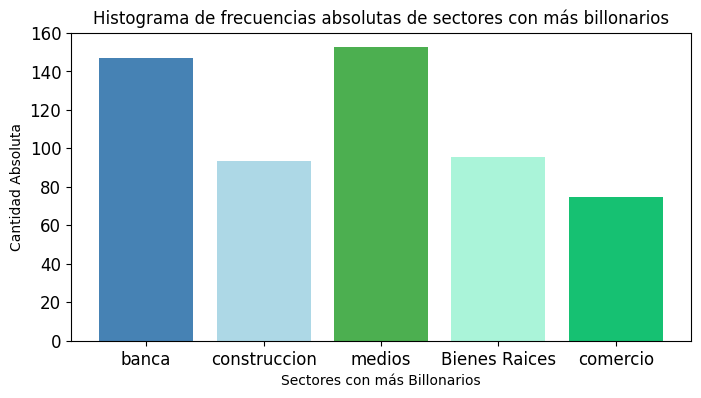

In [105]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias absolutas de sectores con más billonarios')

banca = ricos_filtrado[ricos_filtrado['Company Sector'] == sectores_mas_repetidos[0]]['Wealth Worth In Billions'].sum()
construccion = ricos_filtrado[ricos_filtrado['Company Sector'] == sectores_mas_repetidos[1]]['Wealth Worth In Billions'].sum()
medios = ricos_filtrado[ricos_filtrado['Company Sector'] == sectores_mas_repetidos[2]]['Wealth Worth In Billions'].sum()
BienesRaices = ricos_filtrado[ricos_filtrado['Company Sector'] == sectores_mas_repetidos[3]]['Wealth Worth In Billions'].sum()
comercio = ricos_filtrado[ricos_filtrado['Company Sector'] == sectores_mas_repetidos[4]]['Wealth Worth In Billions'].sum()
total = banca + construccion + medios + BienesRaices + comercio

# Crear el gráfico de barras con las alturas correctas
plt.bar(['banca', 'construccion', 'medios', 'Bienes Raices' , 'comercio'], [banca, construccion, medios, BienesRaices ,comercio]
        , color=['#4682B4', '#ADD8E6', '#4CAF50', '#AAF4D9', '#16C172'])

plt.xlabel('Sectores con más Billonarios')
plt.ylabel('Cantidad Absoluta')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()





# Gráficos de Frecuencias

In [106]:
tipoEmp = ricos['Company Type'].value_counts()
print(tipoEmp.value_counts())

1      5
2      3
691    1
57     1
15     1
12     1
Name: Company Type, dtype: int64


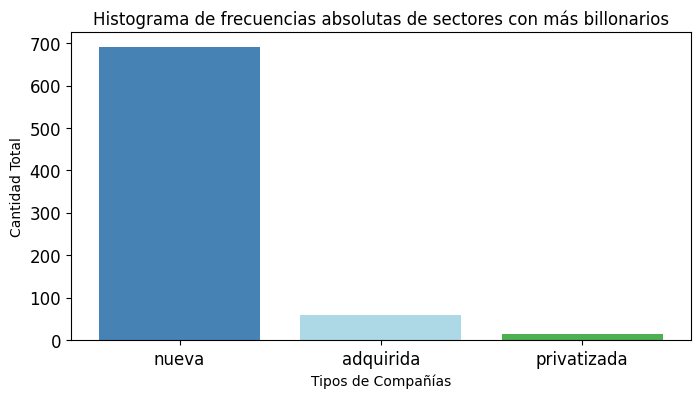

In [107]:

plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias absolutas de sectores con más billonarios')

nueva = (ricos['Company Type'] == 'new').sum()
adquirida = ((ricos['Company Type'] == 'acquired') | (ricos['Company Type'] == 'aquired')).sum()
privatizada = (ricos['Company Type'] == 'privatization').sum()

total = nueva + adquirida + privatizada

# Crear el gráfico de barras con las alturas correctas
plt.bar(['nueva', 'adquirida', 'privatizada'], [nueva, adquirida, privatizada], color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Tipos de Compañías')
plt.ylabel('Cantidad Total')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [108]:
print(ricos['Location GDP'].head(5))

2437    0.000000e+00
1033    9.278395e+10
2575    0.000000e+00
1124    8.100000e+12
1942    0.000000e+00
Name: Location GDP, dtype: float64


In [109]:

def grafico_frecuencias(variable):
    frecuencias = variable.value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(frecuencias.index, frecuencias.values)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.title('Gráfico de Frecuencias')
    plt.xticks(rotation=45, ha='right')  # Agregar rotación y alineación para las etiquetas
    plt.show()

def grafico_frecuencias_relativas(variable):
    frecuencias_relativas = variable.value_counts(normalize=True)
    plt.figure(figsize=(8, 6))
    plt.bar(frecuencias_relativas.index, frecuencias_relativas.values)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia Relativa')
    plt.title('Gráfico de Frecuencias Relativas')
    plt.xticks(rotation=45, ha='right')  # Agregar rotación y alineación para las etiquetas
    plt.show()


In [110]:
ricos['Wealth How Was Founder'].head()

BillonarioA = (ricos['Wealth How Was Founder'] == True).sum()
BillonarioN = (ricos['Wealth How Was Founder'] == False).sum()

print(BillonarioA)
print(BillonarioN)
#Wealth How Inherited

800
0


In [111]:
ricos['Wealth How Inherited'].head()

2437     not inherited
1033     not inherited
2575     not inherited
1124    3rd generation
1942     not inherited
Name: Wealth How Inherited, dtype: category
Categories (6, object): ['3rd generation', '4th generation', '5th generation or longer', 'father',
                         'not inherited', 'spouse/widow']

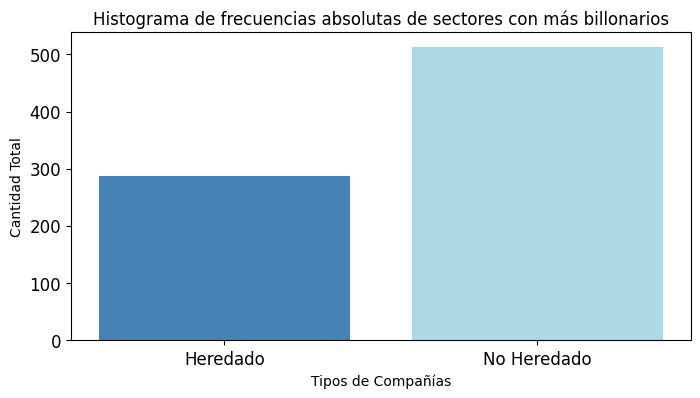

In [112]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias absolutas de sectores con más billonarios')

NBillonario = ((ricos['Wealth How Inherited'] == '3rd generation') |
              (ricos['Wealth How Inherited'] == '4th generation') |
              (ricos['Wealth How Inherited'] == '5th generation or longer') |
              (ricos['Wealth How Inherited'] == 'spouse/widow') |
              (ricos['Wealth How Inherited'] == 'father')).sum()

SelfBillonario = (ricos['Wealth How Inherited'] == 'not inherited').sum()
total = SelfBillonario + NBillonario


# Crear el gráfico de barras con las alturas correctas
plt.bar(['Heredado', 'No Heredado'], [NBillonario, SelfBillonario], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Tipos de Compañías')
plt.ylabel('Cantidad Total')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()




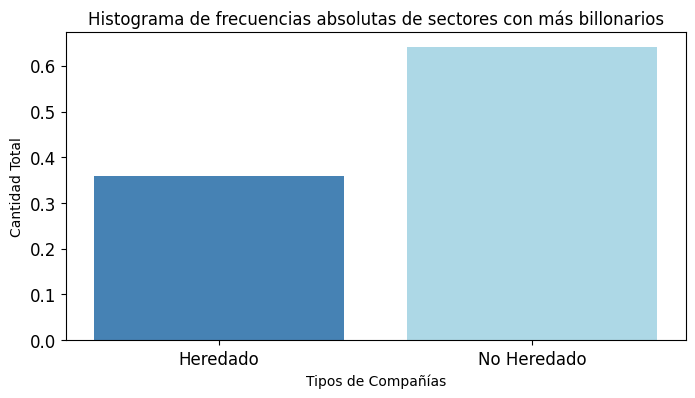

In [113]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias absolutas de sectores con más billonarios')
plt.bar(['Heredado', 'No Heredado'], [NBillonario/total, SelfBillonario/total], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Tipos de Compañías')
plt.ylabel('Cantidad Total')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
